# Practica Final Machine Learning

Autores: Ángela Escolar Santos, Alejandro Arbeloa Zamora, Jorge Yagüe Gonzalez, Antonio Vilches, Gines Ibañez Clemente y Rafael Herranz

## INTRODUCCIÓN

El objetivo de esta práctica será mediante técnicas de aprendizaje supervisado, crear un evaluador automático de precios de alojamientos.
Para ello se precisa de una base de datos de la empresa Airbnb, que muestra diferentes características sobre los alojamientos.

## ANÁLISIS DEL DATASET

Se va a observar como está compuesto el dataset.
Se importan las primeras librerías que se van a utilizar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Airbnb-listings-extract.csv",sep=",",low_memory=False)
data.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,2.017030e+13,07.03.17,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,2.017040e+13,08.04.17,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza CataluÃ±a Catalonia Square is the larg...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,2.017040e+13,08.04.17,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza CataluÃ±a Catalonia Square is the larg...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,2.017040e+13,08.04.17,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,2.017040e+13,08.04.17,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


In [3]:
pd.options.display.max_rows = 89

In [4]:
data.shape

(14780, 89)

Se puede observar que disponemos de 89 variables que aportan características relevantes para el estudio.
También consta de 14780 observaciones.
Se observa la estadística descriptiva de las características:

In [5]:
data.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.478000e+04,1.478000e+04,1.478000e+04,12881.000000,14777.000000,14777.000000,14780.000000,14725.000000,14755.000000,14731.00000,...,14780.000000,11476.000000,11454.000000,11460.000000,11443.000000,11460.000000,11440.000000,11439.000000,14776.000000,11618.000000
mean,1.028089e+07,2.017037e+13,3.608080e+07,94.823461,12.513636,12.513636,3.277808,1.281732,1.343816,2.04426,...,22.632273,91.697978,9.416012,9.328883,9.621778,9.647033,9.532168,9.218201,9.486871,1.870014
std,5.564829e+06,5.668377e+08,3.425360e+07,15.215988,34.090223,34.090223,2.097291,0.658517,0.900078,1.61277,...,38.290244,8.989101,0.921938,0.989933,0.802736,0.767116,0.774527,0.950578,23.626014,1.867550
min,1.862800e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.554732e+06,2.017040e+13,6.787360e+06,100.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.00000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.133492e+07,2.017040e+13,2.464875e+07,100.000000,2.000000,2.000000,3.000000,1.000000,1.000000,2.00000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.200000
75%,1.532631e+07,2.017040e+13,5.432919e+07,100.000000,6.000000,6.000000,4.000000,1.000000,2.000000,2.00000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.910969e+07,2.017060e+13,1.247534e+08,100.000000,519.000000,519.000000,16.000000,8.000000,10.000000,16.00000,...,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


Se puede ver que las variables están en diferentes escalas, por lo que más tarde será necesario escalar y normalizar los datos para que no se preduzcan anomalías en nuestros modelos predictivos.

Se analizan y conocen mejor estas variables:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  float64
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                           5644 non-null   object 
 11  Transit                         9066 non-null   object 
 12  Access                          

Se pueden ver los diferentes tipos de variable, donde contamos tanto con variables continuas como categóricas, que posteriormente será necesario tratar.
También se ve que un gran número de variables cuentan con valores missings, que también se tendrán que analizar para que el estudio sea más preciso.
El objetivo es intentar predecir el precio de los alojamientos, por lo que es imprescindible ver como estará distribuida nuestra variable objetivo, en nuestro caso es 'Price'.

### DISTRIBUCIÓN VARIABLE OBJEIVO 'PRICE'

Como son los diferentes parámetros descriptivos de la variable:

In [7]:
data['Price'].describe()

count    14763.000000
mean        73.561471
std         72.062050
min          9.000000
25%         34.000000
50%         55.000000
75%         86.000000
max        999.000000
Name: Price, dtype: float64

Se ve que la media es 73€, aunque el mínimo es 9€ y el máximos es 999€

In [8]:
print(data['Price'].median())
print(data['Price'].mode())

55.0
0    50.0
Name: Price, dtype: float64


Se pueden ver los diferentes valores que toma la variable objetivo:

In [9]:
porcentaje_price=data['Price'].value_counts(normalize=True).mul(100).rename('porcentaje').reset_index()
contar_price = data['Price'].value_counts().reset_index()
dist_price = pd.merge(porcentaje_price, contar_price, on=['index'], how='inner')
dist_price

,index,porcentaje,Price
0,50.0,4.443541,656
1,60.0,3.901646,576
2,25.0,3.711983,548
3,30.0,3.684888,544
4,35.0,3.237824,478
...,...,...,...
365,612.0,0.006774,1
366,239.0,0.006774,1
367,577.0,0.006774,1
368,875.0,0.006774,1


Se puede ver los valores de los precios y el porcentaje de veces que aparece en el dataset.
Gráficamente, se puede ver la densidad de los valores de la variable con un histograma.

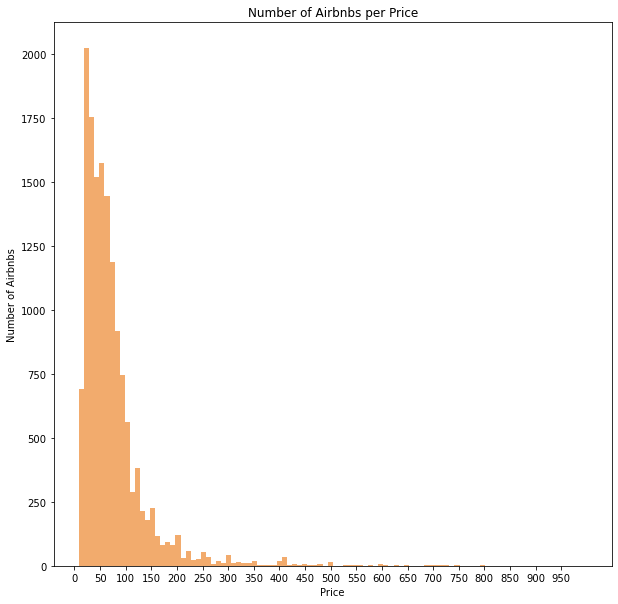

In [10]:
plt.figure(figsize=(10,10))
plt.hist(data.Price, bins=100, color='#F2AB6D')
plt.xticks(np.arange(0, np.max(data.Price),50))
plt.xlabel("Price")
plt.ylabel("Number of Airbnbs")
plt.title("Number of Airbnbs per Price")
plt.show()

Es claro que la mayor parte de los precios se encuentran alrededor de 50€. También hay otros alojamientos, seguramente con mayores prestaciones, con precios muchos más alto. Sería interesante para estudio observar qué características están más relacionadas con precios altos, así como con precios bajos.

## PREPROCESSING

Una vez analizado el dataset y habiendo fijado los objetivos, se busca hacer un preprocesamiento para tener tener un dataset limpio y ordenado, entendiendo mucho mejor cómo afectan las características al precio y cuáles son las más óptimas para realizar los modelos.

Lo primero es eliminar la variable 'ID'  ya que es una forma distinta de denotar lo mismo, en este caso el alojamiento concreto, y ya disponemos de esa información con la observación.

In [11]:
data = data.drop(['ID'], axis=1)

De la misma forma se elimina la variable 'Host Name' ya que ya existe una manera de identificar el host que es con su id, además de que el nombre del dueño no influirá en el precio del alojamiento.

In [12]:
data = data.drop(['Host Name'], axis=1)

A continuación se eliminan todas las variable tipo 'Url', ya que no aportan información (aunque podría resultar interesante realizar algún estudio sobre el contenido de estos links e implementarlo a un trabajo).
Primero se ven cuáles son:

In [13]:
url= [s for s in data if "Url"  in s]
url=list(url)
print(url)

['Listing Url', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host Thumbnail Url', 'Host Picture Url']


In [14]:
URL=[s for s in data if "URL"  in s]
URL=list(URL)
print(URL)

['Host URL']


Se quitan estas variables del dataset

In [15]:
data_new_1=data.drop(columns=url)
data_new_1=data_new_1.drop(columns=URL)
data_new_1.shape

(14780, 79)

Se van a eliminar también los identificadores de scrapping y del host. Por ser identificadores carece de sentido tratarlos como numéricos.

In [16]:
data_new_1=data_new_1.drop(columns=['Scrape ID','Host ID'], axis=1)

También se van a eliminar todas aquellas variables que sean párrafos, ya que entorpecen el estudio, y esa información esta recogida dentro de otras variables.

In [17]:
data_new_1=data_new_1.drop(columns=['Name','Description','Summary','Space','Neighborhood Overview','Notes','Transit','Access',
                          'Interaction','House Rules','Host About','Host Neighbourhood',
                            'Street','Neighbourhood','Amenities','State','Market',
                            'Country','Jurisdiction Names'], axis=1)
data_new_1.shape

(14780, 58)

### MISSINGS

Será muy necesario tratar los valores missings de nuestras variables para que no hayan anomalías en nuestro estudio. Se tendrá que tratar de manera óptima para que no se pierda ni se distorsione información mientras dejamos nuestro dataset sin valores missings.
Con el siguiente código se va a ver el porcentaje de missings que tienen las variables:

In [18]:
df_nulos_col =data_new_1.isnull().sum()
pd_series_null_rows = data_new_1.isnull().sum(axis=1).sort_values(ascending=False)
pd_null_columnas=pd.DataFrame(df_nulos_col, columns=['nulos_columnas'])
pd_null_columnas['porcentaje_columnas'] = pd_null_columnas['nulos_columnas']/data_new_1.shape[0]
pd_null_filas = pd.DataFrame(pd_series_null_rows, columns=['nulos_filas'])
pd_null_filas['porcentaje_filas']= pd_null_filas['nulos_filas']/data_new_1.shape[1]

In [19]:
pd_null_columnas

,nulos_columnas,porcentaje_columnas
Last Scraped,0,0.000000
Experiences Offered,0,0.000000
Host Since,3,0.000203
Host Location,43,0.002909
Host Response Time,1899,0.128484
Host Response Rate,1899,0.128484
Host Acceptance Rate,14741,0.997361
Host Listings Count,3,0.000203
Host Total Listings Count,3,0.000203
Host Verifications,6,0.000406


Se hace lo mismo por filas, es decir vamos a ver el porcentaje de missings que tiene cada observación:

In [20]:
pd_null_filas

,nulos_filas,porcentaje_filas
8891,24,0.413793
14255,24,0.413793
10313,23,0.396552
94,23,0.396552
3317,23,0.396552
...,...,...
4556,2,0.034483
2135,2,0.034483
4978,2,0.034483
6932,2,0.034483


A continuación se eliminan de nuestro dataset todas aquellas variables con un valor supeior al 70% de valores missings.
Se realiza con el siguiente código:

In [21]:
threshold=0.7
list_vars_not_null = list(pd_null_columnas[pd_null_columnas['porcentaje_columnas']<threshold].index)
df_filter_null = data_new_1.loc[:, list_vars_not_null]
df_filter_null.shape

(14780, 52)

In [22]:
df_filter_null

,Last Scraped,Experiences Offered,Host Since,Host Location,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Host Verifications,Neighbourhood Cleansed,...,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,07.03.17,none,11.02.16,My father was USAF so I was born at Offutt AFB...,within an hour,100.0,1.0,1.0,"email,phone,reviews,kba",78733,...,10.0,10.0,10.0,10.0,10.0,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,08.04.17,none,08.11.16,"Barcelona, Catalonia, Spain",within an hour,100.0,162.0,162.0,"email,phone,reviews,work_email",la Dreta de l'Eixample,...,10.0,10.0,10.0,8.0,10.0,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,08.04.17,none,08.11.16,"Barcelona, Catalonia, Spain",within an hour,100.0,162.0,162.0,"email,phone,reviews,work_email",la Dreta de l'Eixample,...,NaN,NaN,NaN,NaN,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,08.04.17,none,25.05.10,"Barcelona, CataluÃ±a, Spain",within an hour,100.0,27.0,27.0,"email,phone,facebook,reviews,manual_offline,ju...",la Dreta de l'Eixample,...,9.0,10.0,10.0,10.0,9.0,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,08.04.17,none,12.01.16,"Madrid, Community of Madrid, Spain",within an hour,99.0,207.0,207.0,"email,phone,reviews,jumio",l'Antiga Esquerra de l'Eixample,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14775,02.05.17,none,18.12.13,"New York, New York, United States",within a few hours,100.0,1.0,1.0,"email,phone,reviews,jumio",Bedford-Stuyvesant,...,10.0,10.0,10.0,9.0,10.0,strict,1.0,0.74,"40.67894535,-73.9393421856","Host Is Superhost,Host Has Profile Pic,Host Id..."
14776,06.04.17,none,24.03.17,France,NaN,NaN,1.0,1.0,"email,phone",Vaugirard,...,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"48.8361969404,2.29404476423","Host Has Profile Pic,Is Location Exact,Instant..."
14777,05.04.17,none,06.07.15,"Madrid, Community of Madrid, Spain",within an hour,100.0,1.0,1.0,"email,phone,reviews,jumio",Batignolles-Monceau,...,10.0,10.0,10.0,10.0,10.0,strict,1.0,2.63,"48.8888092157,2.31617315267","Host Is Superhost,Host Has Profile Pic,Host Id..."
14778,18.05.16,none,20.03.13,"Denver, Colorado, United States",within a few hours,100.0,1.0,1.0,"email,phone,facebook,linkedin,reviews,jumio",City Park West,...,10.0,10.0,10.0,10.0,10.0,moderate,1.0,0.94,"39.7422046438,-104.959933049","Host Has Profile Pic,Host Identity Verified,Is..."


### Tratamiento de las variables categóricas una a una

Una vez realizada la eliminación de valores misings se tratan las variables categóricas una a una.

In [23]:
columns_to_drop = []

In [24]:
Var_discretas=list(df_filter_null.select_dtypes('object').columns) #Lista de variables categóricas
Var_discretas

['Last Scraped',
 'Experiences Offered',
 'Host Since',
 'Host Location',
 'Host Response Time',
 'Host Verifications',
 'Neighbourhood Cleansed',
 'Neighbourhood Group Cleansed',
 'City',
 'Zipcode',
 'Smart Location',
 'Country Code',
 'Latitude',
 'Longitude',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Calendar Updated',
 'Calendar last Scraped',
 'First Review',
 'Last Review',
 'Cancellation Policy',
 'Geolocation',
 'Features']

##### Last Scraped
La columna Last Scraped hace relación a la última vez que se tomaron los datos de la página de airbnb luego se elimina por heurística.

In [25]:
columns_to_drop.append("Last Scraped")

In [26]:
df_filter_null["Experiences Offered"].value_counts()

none        14763
business        8
family          3
social          3
romantic        3
Name: Experiences Offered, dtype: int64

In [27]:
columns_to_drop.append("Experiences Offered")

##### Host Since
Esta variable se va a transformar a días siendo host desde el día que se hizo el host más reciente.

In [28]:
df_filter_null["time_being_host"] = df_filter_null["Host Since"].apply(pd.Timestamp)
df_filter_null["time_being_host"] = (df_filter_null["time_being_host"].max() - df_filter_null["time_being_host"]).apply(lambda x : x.days)
columns_to_drop.append("Host Since")

In [29]:
df_filter_null["time_being_host"]

0         396.0
1         479.0
2         479.0
3        2749.0
4         367.0
          ...  
14775    1446.0
14776     254.0
14777     910.0
14778    1719.0
14779    1322.0
Name: time_being_host, Length: 14780, dtype: float64

##### Host Location

In [30]:
df_filter_null["Host Location"].head()

0    My father was USAF so I was born at Offutt AFB...
1                          Barcelona, Catalonia, Spain
2                          Barcelona, Catalonia, Spain
3                          Barcelona, CataluÃ±a, Spain
4                   Madrid, Community of Madrid, Spain
Name: Host Location, dtype: object

In [31]:
columns_to_drop.append("Host Location")

##### Host Response Time
Al ser una variable categórica ordinal se va a codificar numéricamente, sustituyendo los valores nulos por la moda.

In [32]:
df_filter_null["Host Response Time"].value_counts()

within an hour        7905
within a few hours    2872
within a day          1802
a few days or more     302
Name: Host Response Time, dtype: int64

In [33]:
df_filter_null["Host Response Time"] = df_filter_null["Host Response Time"].apply(lambda x : {"within an hour": 3,
                                                                                              "within a few hours": 2,
                                                                                              "within a day": 1,
                                                                                              "a few days or more": 0,
                                                                                              np.nan:3}[x])

##### Host Verifications
En este caso, se van a tener en cuenta el número de métodos por lo que está verificado el Host. Convertiendo una variable a priori dificil de computar por un modelo en un entero.

In [34]:
df_filter_null["Host Verifications"].value_counts().head()

email,phone,reviews,jumio                  3660
email,phone,reviews                        3504
email,phone,facebook,reviews,jumio          875
email,phone,reviews,jumio,government_id     860
email,phone,facebook,reviews                748
Name: Host Verifications, dtype: int64

In [35]:
df_filter_null["number_host_verifications"] = df_filter_null["Host Verifications"].apply(lambda x : len(str(x).split(",")))

In [36]:
columns_to_drop.append("Host Verifications")

In [37]:
df_filter_null.head()

,Last Scraped,Experiences Offered,Host Since,Host Location,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Host Verifications,Neighbourhood Cleansed,...,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features,time_being_host,number_host_verifications
0,07.03.17,none,11.02.16,My father was USAF so I was born at Offutt AFB...,3,100.0,1.0,1.0,"email,phone,reviews,kba",78733,...,10.0,10.0,10.0,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id...",396.0,4
1,08.04.17,none,08.11.16,"Barcelona, Catalonia, Spain",3,100.0,162.0,162.0,"email,phone,reviews,work_email",la Dreta de l'Eixample,...,10.0,8.0,10.0,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ...",479.0,4
2,08.04.17,none,08.11.16,"Barcelona, Catalonia, Spain",3,100.0,162.0,162.0,"email,phone,reviews,work_email",la Dreta de l'Eixample,...,NaN,NaN,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ...",479.0,4
3,08.04.17,none,25.05.10,"Barcelona, CataluÃ±a, Spain",3,100.0,27.0,27.0,"email,phone,facebook,reviews,manual_offline,ju...",la Dreta de l'Eixample,...,10.0,10.0,9.0,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re...",2749.0,7
4,08.04.17,none,12.01.16,"Madrid, Community of Madrid, Spain",3,99.0,207.0,207.0,"email,phone,reviews,jumio",l'Antiga Esquerra de l'Eixample,...,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is...",367.0,4


##### Neighbourhood Cleansed & Neighbourhood Group Cleansed

In [38]:
df_filter_null["Neighbourhood Cleansed"].value_counts()

Embajadores               1849
Universidad               1363
Palacio                   1084
Sol                        942
Justicia                   789
                          ... 
Alt  Treptow                 1
WÂŠhring                     1
DÂšbling                     1
Frankfurter Allee Nord       1
Ravenna                      1
Name: Neighbourhood Cleansed, Length: 478, dtype: int64

In [39]:
df_filter_null["Neighbourhood Group Cleansed"].value_counts()

Centro                      6780
ChamberÃ­                    960
Salamanca                    883
Arganzuela                   793
TetuÃ¡n                      464
Moncloa - Aravaca            450
Retiro                       439
Latina                       379
ChamartÃ­n                   361
Carabanchel                  358
Ciudad Lineal                309
Puente de Vallecas           222
Hortaleza                    186
Fuencarral - El Pardo        170
Usera                        145
Eixample                     124
San Blas - Canillejas        118
Villaverde                    83
Barajas                       81
Moratalaz                     74
Villa de Vallecas             46
GrÃ cia                       41
Ciutat Vella                  41
Sants-MontjuÃ¯c               39
Manhattan                     35
VicÃ¡lvaro                    34
Brooklyn                      28
Les Corts                     15
Sant MartÃ­                   14
SarriÃ -Sant Gervasi          13
Isole     

In [40]:
others_neighbourhoods = df_filter_null["Neighbourhood Group Cleansed"].value_counts().index[6:]
df_filter_null.loc[df_filter_null["Neighbourhood Group Cleansed"].isin(others_neighbourhoods), "Neighbourhood Group Cleansed"] = "other_neighbourhoods"

In [41]:
dummies = pd.get_dummies(df_filter_null["Neighbourhood Group Cleansed"])
df_filter_null = pd.concat([df_filter_null, dummies], axis = 1)

In [42]:
columns_to_drop.append("Neighbourhood Group Cleansed")
columns_to_drop.append("Neighbourhood Cleansed")

##### City

In [43]:
df_filter_null["City"].value_counts()

Madrid            13207
Barcelona           292
London              132
Paris               108
é©¬å¾·é‡Œ            52
                  ...  
Son Moll              1
La Habana             1
Mile End / Bow        1
Sint-Gillis           1
Son Vida              1
Name: City, Length: 246, dtype: int64

La mayoria son de Madrid luego se va eliminar

In [44]:
columns_to_drop.append("City")


##### Zipcode
Se deduce que el zipcode estará cubierto por el barrio

In [45]:
df_filter_null["Zipcode"].value_counts()

28012    2065
28004    1803
28005    1195
28013    1019
28014     633
         ... 
10318       1
10715       1
10965       1
10115       1
80206       1
Name: Zipcode, Length: 617, dtype: int64

In [46]:
columns_to_drop.append("Zipcode")


##### Smart Location
No da información

In [47]:
df_filter_null["Smart Location"].value_counts()

Madrid, Spain                     13194
Barcelona, Spain                    290
London, United Kingdom              129
Paris, France                       108
é©¬å¾·é‡Œ, Spain                     52
                                  ...  
Caimari, Spain                        1
Sint-Gillis, Belgium                  1
Mile End / Bow, United Kingdom        1
Porto Cristo, Spain                   1
Son Vida, Spain                       1
Name: Smart Location, Length: 257, dtype: int64

In [48]:
columns_to_drop.append("Smart Location")


##### Country Code
La gran mayoria son España

In [49]:
df_filter_null["Country Code"].value_counts()

ES    14001
US      184
GB      159
FR      110
IT       68
AU       46
IE       45
DE       41
AT       31
NL       26
CA       20
BE       17
DK       16
CH        6
GR        5
HK        3
It        1
CU        1
Name: Country Code, dtype: int64

In [50]:
columns_to_drop.append("Country Code")


##### Latitude & Longitude
Se van a eliminar por simple heurística

In [51]:
columns_to_drop.append("Latitude")
columns_to_drop.append("Longitude")


##### Property Type

In [52]:
df_filter_null["Property Type"].value_counts()

Apartment             11962
House                  1368
Condominium             363
Bed & Breakfast         353
Loft                    305
Other                   225
Dorm                     44
Guesthouse               42
Chalet                   26
Villa                    19
Townhouse                17
Hostel                   16
Serviced apartment       13
Boutique hotel            6
Boat                      4
Camper/RV                 4
Guest suite               3
Casa particular           3
Earth House               3
Bungalow                  2
Tent                      1
Timeshare                 1
Name: Property Type, dtype: int64

In [53]:
others_properties = df_filter_null["Property Type"].value_counts().index[5:]
df_filter_null.loc[df_filter_null["Property Type"].isin(others_properties), "Property Type"] = "other_properties"
df_filter_null["Property Type"].value_counts()

Apartment           11962
House                1368
other_properties      429
Condominium           363
Bed & Breakfast       353
Loft                  305
Name: Property Type, dtype: int64

In [54]:
dummies = pd.get_dummies(df_filter_null["Property Type"])
df_filter_null = pd.concat([df_filter_null, dummies], axis = 1)

In [55]:
columns_to_drop.append("Property Type")


##### Room Type

In [56]:
df_filter_null["Room Type"].value_counts()

Entire home/apt    8976
Private room       5595
Shared room         209
Name: Room Type, dtype: int64

In [57]:
dummies = pd.get_dummies(df_filter_null["Room Type"])
df_filter_null = pd.concat([df_filter_null, dummies], axis = 1)

In [58]:
columns_to_drop.append("Room Type")

In [59]:
df_filter_null.head()

,Last Scraped,Experiences Offered,Host Since,Host Location,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Host Verifications,Neighbourhood Cleansed,...,other_neighbourhoods,Apartment,Bed & Breakfast,Condominium,House,Loft,other_properties,Entire home/apt,Private room,Shared room
0,07.03.17,none,11.02.16,My father was USAF so I was born at Offutt AFB...,3,100.0,1.0,1.0,"email,phone,reviews,kba",78733,...,0,0,0,0,0,1,0,1,0,0
1,08.04.17,none,08.11.16,"Barcelona, Catalonia, Spain",3,100.0,162.0,162.0,"email,phone,reviews,work_email",la Dreta de l'Eixample,...,1,1,0,0,0,0,0,1,0,0
2,08.04.17,none,08.11.16,"Barcelona, Catalonia, Spain",3,100.0,162.0,162.0,"email,phone,reviews,work_email",la Dreta de l'Eixample,...,1,1,0,0,0,0,0,1,0,0
3,08.04.17,none,25.05.10,"Barcelona, CataluÃ±a, Spain",3,100.0,27.0,27.0,"email,phone,facebook,reviews,manual_offline,ju...",la Dreta de l'Eixample,...,1,1,0,0,0,0,0,1,0,0
4,08.04.17,none,12.01.16,"Madrid, Community of Madrid, Spain",3,99.0,207.0,207.0,"email,phone,reviews,jumio",l'Antiga Esquerra de l'Eixample,...,1,1,0,0,0,0,0,1,0,0



##### Bed Type

In [60]:
df_filter_null["Bed Type"].value_counts()

Real Bed         14456
Pull-out Sofa      258
Futon               42
Couch               19
Airbed               5
Name: Bed Type, dtype: int64

La mayoria son ela misma clase luego mejor se elimina

In [61]:
columns_to_drop.append("Bed Type")


##### Calendar Updated

In [62]:
df_filter_null["Calendar Updated"].value_counts()

today            3924
yesterday        1212
2 weeks ago      1212
a week ago       1140
3 days ago        842
4 days ago        665
2 months ago      571
3 weeks ago       556
5 days ago        531
4 weeks ago       438
2 days ago        390
5 weeks ago       352
3 months ago      342
6 weeks ago       264
4 months ago      239
6 days ago        225
5 months ago      203
6 months ago      192
9 months ago      163
7 months ago      160
7 weeks ago       147
8 months ago      136
never             118
10 months ago      97
1 week ago         94
11 months ago      72
12 months ago      52
14 months ago      49
15 months ago      48
13 months ago      46
16 months ago      44
21 months ago      41
20 months ago      34
17 months ago      33
22 months ago      33
19 months ago      30
18 months ago      28
24 months ago      11
23 months ago      11
29 months ago       6
26 months ago       4
25 months ago       3
48 months ago       3
28 months ago       2
30 months ago       2
52 months 

Por falta de conocimiento experto y no entender esta variable se procede a su eliminación también.

In [63]:
columns_to_drop.append("Calendar Updated")


##### Calendar last Scraped

In [64]:
df_filter_null["Calendar last Scraped"].value_counts()

08.04.17    9946
07.04.17    3683
15.03.17     376
04.03.17      87
09.05.17      85
03.05.17      71
08.05.17      71
05.04.17      70
05.03.17      59
18.02.17      45
04.04.17      41
02.04.17      34
03.04.17      25
04.05.17      25
10.05.17      23
06.04.17      19
02.05.17      17
15.06.17      16
03.06.17      14
09.07.16       9
04.01.16       9
05.05.17       7
08.08.16       6
02.06.17       6
04.05.16       5
06.07.16       5
06.09.16       3
11.04.16       3
07.08.16       3
12.05.17       3
07.05.17       3
06.03.17       2
07.03.17       2
20.05.16       2
18.05.16       2
02.04.16       1
12.04.16       1
11.05.17       1
Name: Calendar last Scraped, dtype: int64

Se considera que no aporta información relevante para los modelos

In [65]:
columns_to_drop.append("Calendar last Scraped")


##### First Review

In [66]:
df_filter_null["First Review"].value_counts()

09.10.16    65
26.02.17    62
11.09.16    62
02.01.17    56
11.12.16    54
            ..
05.02.15     1
11.09.11     1
21.01.14     1
08.05.15     1
25.02.15     1
Name: First Review, Length: 1679, dtype: int64

In [67]:
df_filter_null["time_first_review"] = df_filter_null["First Review"].apply(pd.Timestamp)
df_filter_null["time_first_review"] = (df_filter_null["time_first_review"].max() - df_filter_null["time_first_review"]).apply(lambda x : x.days)
columns_to_drop.append("First Review")


##### Last Review

In [68]:
df_filter_null["Last Review"].value_counts()

02.04.17    752
26.03.17    497
03.04.17    467
19.03.17    365
04.04.17    312
           ... 
25.12.15      1
19.09.13      1
20.11.15      1
08.02.16      1
05.06.15      1
Name: Last Review, Length: 785, dtype: int64

In [69]:
df_filter_null["time_last_review"] = df_filter_null["Last Review"].apply(pd.Timestamp)
df_filter_null["time_last_review"] = (df_filter_null["time_last_review"].max() - df_filter_null["time_last_review"]).apply(lambda x : x.days)
columns_to_drop.append("Last Review")


##### Cancellation Policy

In [70]:
df_filter_null["Cancellation Policy"].value_counts()

strict             5742
flexible           4671
moderate           4248
strict_new           34
super_strict_60      32
moderate_new         20
super_strict_30      19
flexible_new         14
Name: Cancellation Policy, dtype: int64

In [71]:
others_cancellations = df_filter_null["Cancellation Policy"].value_counts().index[3:]
df_filter_null.loc[df_filter_null["Cancellation Policy"].isin(others_cancellations), "Cancellation Policy"] = np.nan
df_filter_null["Cancellation Policy"].value_counts()

strict      5742
flexible    4671
moderate    4248
Name: Cancellation Policy, dtype: int64

In [72]:
dummies = pd.get_dummies(df_filter_null["Cancellation Policy"])
df_filter_null = pd.concat([df_filter_null, dummies], axis=1)
columns_to_drop.append("Cancellation Policy")


##### Geolocation

In [73]:
df_filter_null["Geolocation"].value_counts()

30.3373609355,-97.8632766782    1
40.4147010713,-3.71257828785    1
40.4094519774,-3.71074542342    1
40.4086012604,-3.71459579097    1
40.4197434394,-3.71216052728    1
                               ..
40.4119127665,-3.70687953752    1
40.4082487489,-3.69685888648    1
40.4103369023,-3.70372652723    1
40.413918808,-3.70356167298     1
47.6723272189,-122.291451162    1
Name: Geolocation, Length: 14780, dtype: int64

In [74]:
columns_to_drop.append("Geolocation")


##### Features


In [75]:
df_filter_null["Features"].value_counts()

Host Has Profile Pic,Host Identity Verified,Is Location Exact,Requires License                                                                                                      2508
Host Has Profile Pic,Is Location Exact,Requires License                                                                                                                             2086
Host Has Profile Pic,Host Identity Verified,Is Location Exact,Requires License,Instant Bookable                                                                                     1771
Host Has Profile Pic,Host Identity Verified,Requires License                                                                                                                        1433
Host Has Profile Pic,Requires License                                                                                                                                               1376
Host Has Profile Pic,Is Location Exact,Requires License,Instant Bookable   

In [76]:
df_filter_null["Features"] = df_filter_null["Features"].apply(lambda x: str(x).split(","))

In [77]:
list_features = []
for i in range(len(df_filter_null)):
    features = df_filter_null.loc[i, "Features"]
    for feature in features:
        list_features.append(feature)

In [78]:
features = np.unique(np.array(list_features))
features

array(['Host Has Profile Pic', 'Host Identity Verified',
       'Host Is Superhost', 'Instant Bookable', 'Is Location Exact',
       'Require Guest Phone Verification',
       'Require Guest Profile Picture', 'Requires License', 'nan'],
      dtype='<U32')

In [79]:
for feature in features[:-1]:
    for i in df_filter_null.index:
        df_filter_null.loc[i,feature] = int(feature in df_filter_null.loc[i, "Features"])

In [80]:
df_filter_null

,Last Scraped,Experiences Offered,Host Since,Host Location,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Host Verifications,Neighbourhood Cleansed,...,moderate,strict,Host Has Profile Pic,Host Identity Verified,Host Is Superhost,Instant Bookable,Is Location Exact,Require Guest Phone Verification,Require Guest Profile Picture,Requires License
0,07.03.17,none,11.02.16,My father was USAF so I was born at Offutt AFB...,3,100.0,1.0,1.0,"email,phone,reviews,kba",78733,...,1,0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,08.04.17,none,08.11.16,"Barcelona, Catalonia, Spain",3,100.0,162.0,162.0,"email,phone,reviews,work_email",la Dreta de l'Eixample,...,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,08.04.17,none,08.11.16,"Barcelona, Catalonia, Spain",3,100.0,162.0,162.0,"email,phone,reviews,work_email",la Dreta de l'Eixample,...,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,08.04.17,none,25.05.10,"Barcelona, CataluÃ±a, Spain",3,100.0,27.0,27.0,"email,phone,facebook,reviews,manual_offline,ju...",la Dreta de l'Eixample,...,0,1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,08.04.17,none,12.01.16,"Madrid, Community of Madrid, Spain",3,99.0,207.0,207.0,"email,phone,reviews,jumio",l'Antiga Esquerra de l'Eixample,...,0,0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14775,02.05.17,none,18.12.13,"New York, New York, United States",2,100.0,1.0,1.0,"email,phone,reviews,jumio",Bedford-Stuyvesant,...,0,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
14776,06.04.17,none,24.03.17,France,3,NaN,1.0,1.0,"email,phone",Vaugirard,...,0,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
14777,05.04.17,none,06.07.15,"Madrid, Community of Madrid, Spain",3,100.0,1.0,1.0,"email,phone,reviews,jumio",Batignolles-Monceau,...,0,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
14778,18.05.16,none,20.03.13,"Denver, Colorado, United States",2,100.0,1.0,1.0,"email,phone,facebook,linkedin,reviews,jumio",City Park West,...,1,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [81]:
columns_to_drop.append("Features")

In [82]:
df_filter_null = df_filter_null.drop(columns_to_drop, axis=1)

In [83]:
df_filter_null.head()

,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,...,moderate,strict,Host Has Profile Pic,Host Identity Verified,Host Is Superhost,Instant Bookable,Is Location Exact,Require Guest Phone Verification,Require Guest Profile Picture,Requires License
0,3,100.0,1.0,1.0,2,1.0,1.0,1.0,58.0,100.0,...,1,0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,3,100.0,162.0,162.0,4,1.0,1.0,1.0,70.0,200.0,...,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,3,100.0,162.0,162.0,4,1.0,1.0,1.0,70.0,200.0,...,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,3,100.0,27.0,27.0,8,2.0,3.0,4.0,229.0,250.0,...,0,1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,3,99.0,207.0,207.0,5,1.0,2.0,2.0,149.0,NaN,...,0,0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


Renombramos nuestro dataset y observamos como ha quedado:

In [84]:
df1= df_filter_null
df1.head()

,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,...,moderate,strict,Host Has Profile Pic,Host Identity Verified,Host Is Superhost,Instant Bookable,Is Location Exact,Require Guest Phone Verification,Require Guest Profile Picture,Requires License
0,3,100.0,1.0,1.0,2,1.0,1.0,1.0,58.0,100.0,...,1,0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,3,100.0,162.0,162.0,4,1.0,1.0,1.0,70.0,200.0,...,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,3,100.0,162.0,162.0,4,1.0,1.0,1.0,70.0,200.0,...,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,3,100.0,27.0,27.0,8,2.0,3.0,4.0,229.0,250.0,...,0,1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,3,99.0,207.0,207.0,5,1.0,2.0,2.0,149.0,NaN,...,0,0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


Por filas se observa que no tenemos ninguna observación relevante que eliminar.

In [85]:
index_null_filas = np.where(pd_null_filas['porcentaje_filas']>= 0.6)[0]
index_null_filas = list(index_null_filas)
print(index_null_filas)

[]


Ahora se ven el tipo de variables que quedan.

In [86]:
df1.dtypes

Host Response Time                    int64
Host Response Rate                  float64
Host Listings Count                 float64
Host Total Listings Count           float64
Accommodates                          int64
Bathrooms                           float64
Bedrooms                            float64
Beds                                float64
Price                               float64
Security Deposit                    float64
Cleaning Fee                        float64
Guests Included                       int64
Extra People                          int64
Minimum Nights                        int64
Maximum Nights                        int64
Availability 30                       int64
Availability 60                       int64
Availability 90                       int64
Availability 365                      int64
Number of Reviews                     int64
Review Scores Rating                float64
Review Scores Accuracy              float64
Review Scores Cleanliness       

In [87]:
Var_discretas=list(df1.select_dtypes('object').columns) #Lista de variables categóricas
Var_discretas

[]

Ya todas las variables categoricas han sido procesadas para computarse como variables numéricas

In [88]:
Var_continuas=list(df1.select_dtypes(np.number).columns) #Lista variables continuas
Var_continuas

['Host Response Time',
 'Host Response Rate',
 'Host Listings Count',
 'Host Total Listings Count',
 'Accommodates',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Price',
 'Security Deposit',
 'Cleaning Fee',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Maximum Nights',
 'Availability 30',
 'Availability 60',
 'Availability 90',
 'Availability 365',
 'Number of Reviews',
 'Review Scores Rating',
 'Review Scores Accuracy',
 'Review Scores Cleanliness',
 'Review Scores Checkin',
 'Review Scores Communication',
 'Review Scores Location',
 'Review Scores Value',
 'Calculated host listings count',
 'Reviews per Month',
 'time_being_host',
 'number_host_verifications',
 'Arganzuela',
 'Centro',
 'ChamberÃ\xad',
 'Moncloa - Aravaca',
 'Salamanca',
 'TetuÃ¡n',
 'other_neighbourhoods',
 'Apartment',
 'Bed & Breakfast',
 'Condominium',
 'House',
 'Loft',
 'other_properties',
 'Entire home/apt',
 'Private room',
 'Shared room',
 'time_first_review',
 'time_last_review',
 'flexible',
 'modera

Se va a proceder ahora a seguir tratando los missings que se tienen en el dataset, para ello se va a sustituir estos valores missings por la mediana.

In [89]:
df1=df1.fillna(df1.median())

Se comprueba que no hay missings.

In [90]:
any(df1.isnull().sum())

False

Ya no hay valores missings en el dataset.
Se procede a estudiar las correlaciones de las variables:

### CORRELACIONES

Vamos a ver la correlación entre estas variables numéricas ya que posteriormente puede mejorar nuestro estudio eliminar aquellas que aporten gran cantidad de información similar, y ver si tiene sentido realizar un análisis de componentes principales para optimizar nuestro estudio.
Observamos la matriz de correlaciones de nuestras variables numéricas:

In [91]:
df1_cor=df1[Var_continuas].corr(method='pearson')
df1_cor

,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,...,moderate,strict,Host Has Profile Pic,Host Identity Verified,Host Is Superhost,Instant Bookable,Is Location Exact,Require Guest Phone Verification,Require Guest Profile Picture,Requires License
Host Response Time,1.000000,0.609032,-0.027939,-0.027939,0.001429,-0.079622,-0.048026,-0.028386,-0.008695,-0.026333,...,-0.000247,0.046303,0.001496,0.076969,0.067864,0.345282,0.000684,-0.051246,0.014764,0.014004
Host Response Rate,0.609032,1.000000,-0.022519,-0.022519,0.040288,-0.027725,0.008425,0.022356,0.004907,0.001543,...,0.037472,0.024346,0.022951,0.100062,0.071859,0.109199,0.026073,0.023372,0.025970,0.013218
Host Listings Count,-0.027939,-0.022519,1.000000,1.000000,0.227165,0.234428,0.186003,0.177021,0.226505,0.022579,...,-0.144350,0.271307,0.016346,0.072862,-0.103233,0.163878,0.110491,0.176835,-0.024767,0.053508
Host Total Listings Count,-0.027939,-0.022519,1.000000,1.000000,0.227165,0.234428,0.186003,0.177021,0.226505,0.022579,...,-0.144350,0.271307,0.016346,0.072862,-0.103233,0.163878,0.110491,0.176835,-0.024767,0.053508
Accommodates,0.001429,0.040288,0.227165,0.227165,1.000000,0.430835,0.723412,0.837126,0.520432,0.181424,...,-0.004999,0.209677,0.013864,0.117707,0.027907,0.095750,0.090038,0.105335,-0.014169,0.037724
Bathrooms,-0.079622,-0.027725,0.234428,0.234428,0.430835,1.000000,0.524489,0.475873,0.383238,0.151242,...,-0.098536,0.167490,0.011463,0.037540,-0.012423,-0.058346,0.048085,0.121887,-0.004407,0.029848
Bedrooms,-0.048026,0.008425,0.186003,0.186003,0.723412,0.524489,1.000000,0.731142,0.495599,0.192080,...,-0.052205,0.133682,-0.007816,0.069838,0.004895,-0.001158,0.027411,0.113273,-0.010392,0.023897
Beds,-0.028386,0.022356,0.177021,0.177021,0.837126,0.475873,0.731142,1.000000,0.440032,0.156812,...,-0.027522,0.163787,-0.004050,0.072234,0.007865,0.036133,0.063675,0.110354,-0.015667,0.052782
Price,-0.008695,0.004907,0.226505,0.226505,0.520432,0.383238,0.495599,0.440032,1.000000,0.238390,...,-0.074993,0.143566,-0.002331,0.071761,0.018280,0.056577,0.039770,0.088470,0.003998,-0.121978
Security Deposit,-0.026333,0.001543,0.022579,0.022579,0.181424,0.151242,0.192080,0.156812,0.238390,1.000000,...,-0.057366,0.132031,0.003004,0.053731,0.040413,-0.045287,0.050181,0.006177,0.019935,-0.082381


Podemos observar el mapa de estas correlaciones oara verlo todo más visual con la siguiente función:

In [92]:
def get_corr_matrix(dataset, metodo='pearson', size_figure=[10,8]):
    sns.set(style="white")
    corr = dataset.corr(method=metodo)
    for i in range(corr.shape[0]):
        corr.iloc[i, i] = 0
    f, ax = plt.subplots(figsize=size_figure)
    sns.heatmap(corr, center=0,
                square=True, linewidths=.5,  cmap ='viridis' ) 
    plt.show()

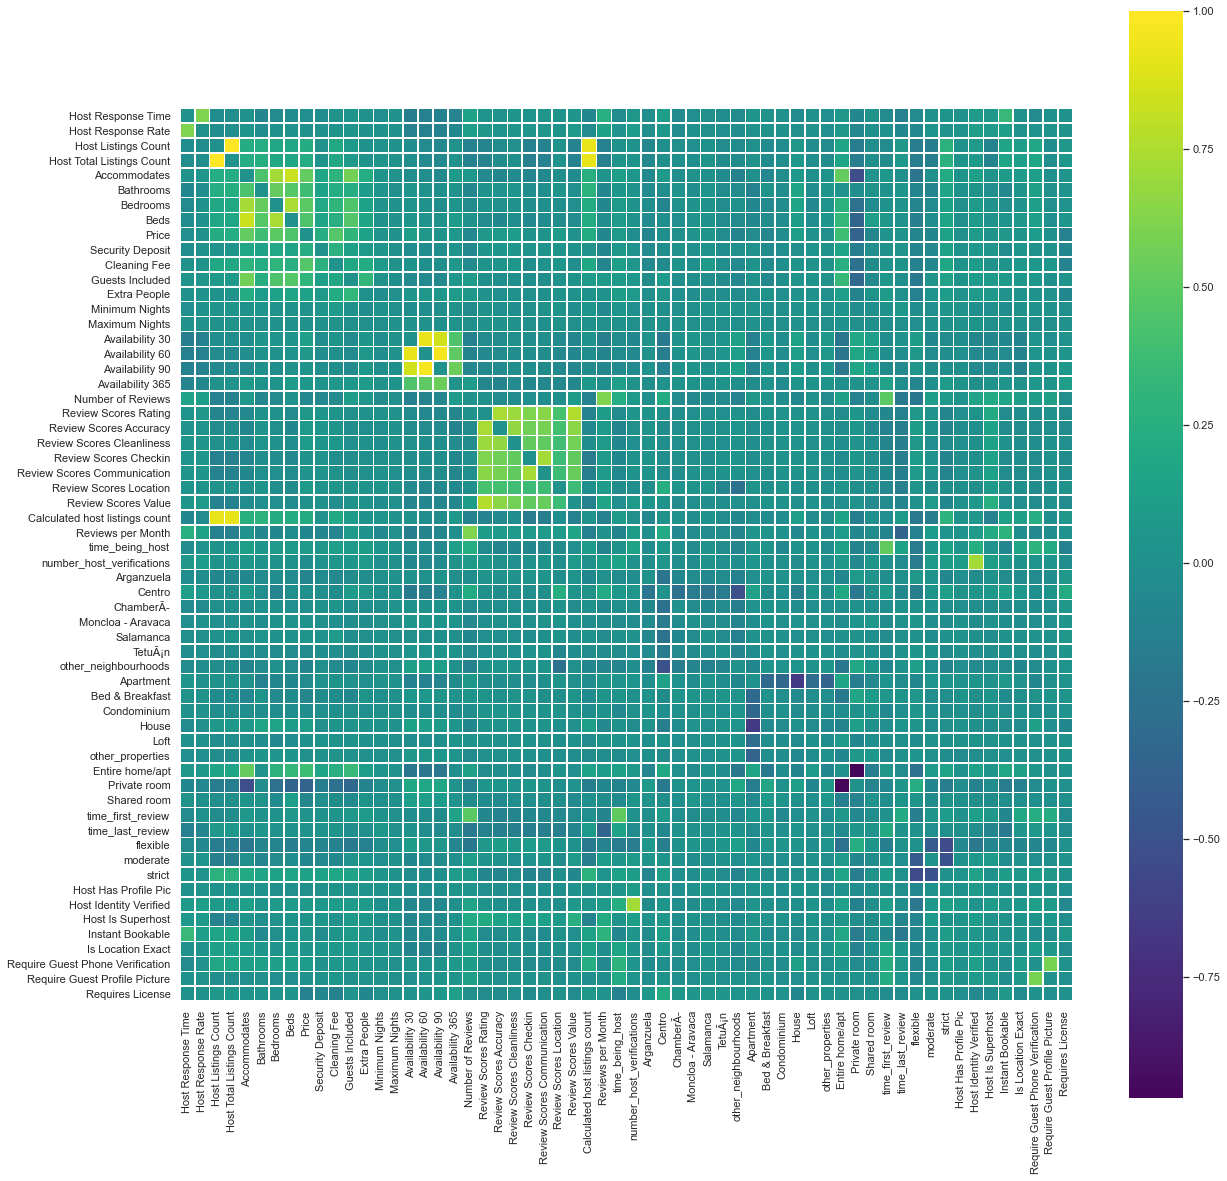

In [93]:
get_corr_matrix(dataset = df1[Var_continuas], metodo = 'pearson', size_figure=(20,20))

Podemos observar visualmente que hay como 3 grupos de variables muy correladas, el primero hace referencia las variables que describen el propio piso y sus capacidades y políticas('Accommodates', 'Beds', 'Security Deposit', etc..).
También tenemos otro que hace referencia la disponibilidad del alojamiento en cantidades de días.
Y por último el tercer grupo de variables muy correladas entre sí son las que hacen referencia a los 'Review Scores'

Vamos a analizar la correlación de las variables con nuestra variable objetivo 'Price':

In [94]:
abs(df1_cor['Price']).sort_values()[::-1]

Price                               1.000000
Accommodates                        0.520432
Bedrooms                            0.495599
Cleaning Fee                        0.464952
Beds                                0.440032
Bathrooms                           0.383238
Entire home/apt                     0.372344
Private room                        0.357543
Guests Included                     0.300520
Security Deposit                    0.238390
Host Listings Count                 0.226505
Host Total Listings Count           0.226505
Calculated host listings count      0.222228
strict                              0.143566
Extra People                        0.123123
Requires License                    0.121978
Availability 30                     0.109988
House                               0.105924
other_neighbourhoods                0.102632
Review Scores Location              0.098149
Arganzuela                          0.089549
Require Guest Phone Verification    0.088470
flexible  

Vemos que las variables más correlacionadas con 'Price' son Bedrooms, Cleaning Fee, Beds, Bathrooms, Entire home/apt, Private room, Guests Included, Security Deposit y las variables relacionadas con 'Host Listings Count', por lo que estas caractrísticas podrán tener un peso importante en nuestros modelos.

Ahora vamos a ver las variables que tengan una correlación alta entre ellas, ya que podría ser muy útil para enriquecer nuestro dataset quedarnos con las variables que expliquen la mayor parte de la información de los datos, ya que si dos variables están muy correladas podríamos elegir solo 1 para explicar esa cantidad de información.
Vamos a observar las que tengan una correlación superior a 0.65:

In [95]:
corr = df1.corr('pearson')
new_corr = corr.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1)
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)
new_corr[new_corr['correlation']>0.65]

,level_0,level_1,correlation
182,Host Total Listings Count,Host Listings Count,1.000000
2744,Private room,Entire home/apt,0.970595
1036,Availability 90,Availability 60,0.963501
1623,Calculated host listings count,Host Total Listings Count,0.922842
1622,Calculated host listings count,Host Listings Count,0.922842
975,Availability 60,Availability 30,0.921476
1035,Availability 90,Availability 30,0.849756
424,Beds,Accommodates,0.837126
1580,Review Scores Value,Review Scores Rating,0.765732
1280,Review Scores Accuracy,Review Scores Rating,0.735448


Con la siguiente función vamos a poder seleccionar estas variables que hemos visto antes y tener en una lista las variables cuya información esta recogida en otras( por ejemplo no aparece la variable 'Accommodates' ya que es la que explica la información de 'Beds' o 'Bedrooms' que en cambio sí aparecen) por lo que podremos eliminarlas después, nos basta con introducir nuestras variables y un threshold, en nuestro caso 0,65:

In [96]:
def correlation(x,threshold):
    correlated_cols=[]
    corr_matrix=x.corr('pearson')
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                correlated_cols.append(colname)
    return correlated_cols

In [97]:
correlation(df1, 0.65)

['Host Total Listings Count',
 'Bedrooms',
 'Beds',
 'Beds',
 'Availability 60',
 'Availability 90',
 'Availability 90',
 'Review Scores Accuracy',
 'Review Scores Cleanliness',
 'Review Scores Cleanliness',
 'Review Scores Communication',
 'Review Scores Value',
 'Calculated host listings count',
 'Calculated host listings count',
 'House',
 'Private room',
 'Host Identity Verified']

Vemos que algunas variables aparecen repetidas ya que están correladas con más de una, con la función set podremos coger la lista con valores únicos que es lo que nos interesa:

In [98]:
lista = set(correlation(df1, 0.65))
variables_cor = list(lista)
variables_cor

['Host Identity Verified',
 'Review Scores Accuracy',
 'Availability 60',
 'Host Total Listings Count',
 'Review Scores Cleanliness',
 'Availability 90',
 'Review Scores Value',
 'Private room',
 'Beds',
 'Review Scores Communication',
 'Calculated host listings count',
 'Bedrooms',
 'House']

Ahora procedemos a eliminar las variables de Availability 90 y 60 por estar representadas por la variable Availability 30.

In [99]:
columns_to_drop = []

In [100]:
columns_to_drop.append('Availability 90')
columns_to_drop.append('Availability 60')
columns_to_drop.append('Availability 365')

Las que tengan que ver con Host Listing Count también van a estar representadas por Host Listing Count

In [101]:
columns_to_drop.append('Calculated host listings count')
columns_to_drop.append('Host Total Listings Count')

In [102]:
df1 = df1.drop(columns_to_drop, axis=1)

#### ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)

Ahora vamos a realizar un análisis de componentes principales de nuestras variables continuas para que la mayor cantidad de información quede recogida en menos dimensiones.
Primero vamos a eliminar de este conjunto de variables la variable Price ya que es la que vamos a intentar predecir.

In [103]:
Var_continuas2 = list(df1.select_dtypes(np.number).columns)
Var_continuas2

['Host Response Time',
 'Host Response Rate',
 'Host Listings Count',
 'Accommodates',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Price',
 'Security Deposit',
 'Cleaning Fee',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Maximum Nights',
 'Availability 30',
 'Number of Reviews',
 'Review Scores Rating',
 'Review Scores Accuracy',
 'Review Scores Cleanliness',
 'Review Scores Checkin',
 'Review Scores Communication',
 'Review Scores Location',
 'Review Scores Value',
 'Reviews per Month',
 'time_being_host',
 'number_host_verifications',
 'Arganzuela',
 'Centro',
 'ChamberÃ\xad',
 'Moncloa - Aravaca',
 'Salamanca',
 'TetuÃ¡n',
 'other_neighbourhoods',
 'Apartment',
 'Bed & Breakfast',
 'Condominium',
 'House',
 'Loft',
 'other_properties',
 'Entire home/apt',
 'Private room',
 'Shared room',
 'time_first_review',
 'time_last_review',
 'flexible',
 'moderate',
 'strict',
 'Host Has Profile Pic',
 'Host Identity Verified',
 'Host Is Superhost',
 'Instant Bookable',
 'Is Location E

In [104]:
Var_continuas2.pop(6)
Var_continuas2

['Host Response Time',
 'Host Response Rate',
 'Host Listings Count',
 'Accommodates',
 'Bathrooms',
 'Bedrooms',
 'Price',
 'Security Deposit',
 'Cleaning Fee',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Maximum Nights',
 'Availability 30',
 'Number of Reviews',
 'Review Scores Rating',
 'Review Scores Accuracy',
 'Review Scores Cleanliness',
 'Review Scores Checkin',
 'Review Scores Communication',
 'Review Scores Location',
 'Review Scores Value',
 'Reviews per Month',
 'time_being_host',
 'number_host_verifications',
 'Arganzuela',
 'Centro',
 'ChamberÃ\xad',
 'Moncloa - Aravaca',
 'Salamanca',
 'TetuÃ¡n',
 'other_neighbourhoods',
 'Apartment',
 'Bed & Breakfast',
 'Condominium',
 'House',
 'Loft',
 'other_properties',
 'Entire home/apt',
 'Private room',
 'Shared room',
 'time_first_review',
 'time_last_review',
 'flexible',
 'moderate',
 'strict',
 'Host Has Profile Pic',
 'Host Identity Verified',
 'Host Is Superhost',
 'Instant Bookable',
 'Is Location Exact',
 '

Como se puede observar se ha eliminado la variable 'Price' de nuestra lista de variables numéricas sobre la que se pretende realizar el análisis de componentes principales.
Ahora se van a importar las librerías que se necesitanpara dicho análisis:

In [105]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

Primero se van a analizar la estadística descriptiva de nuestra nueva lista de variable numéricas:

In [106]:
df1[Var_continuas2].describe()

,Host Response Time,Host Response Rate,Host Listings Count,Accommodates,Bathrooms,Bedrooms,Price,Security Deposit,Cleaning Fee,Guests Included,...,moderate,strict,Host Has Profile Pic,Host Identity Verified,Host Is Superhost,Instant Bookable,Is Location Exact,Require Guest Phone Verification,Require Guest Profile Picture,Requires License
count,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,...,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000
mean,2.500541,95.488566,12.511502,3.277808,1.280683,1.343234,73.540122,166.603721,28.999865,1.589986,...,0.287415,0.388498,0.996482,0.586806,0.115359,0.367321,0.652774,0.040934,0.019756,0.948512
std,0.785164,14.310050,34.087092,2.097291,0.657514,0.899428,72.023341,77.379974,23.908403,1.182550,...,0.452572,0.487425,0.059213,0.492424,0.319465,0.482091,0.476104,0.198143,0.139167,0.220999
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,100.000000,1.000000,2.000000,1.000000,1.000000,34.000000,150.000000,20.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,100.000000,2.000000,3.000000,1.000000,1.000000,55.000000,150.000000,25.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,100.000000,6.000000,4.000000,1.000000,2.000000,86.000000,150.000000,30.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,100.000000,519.000000,16.000000,8.000000,10.000000,999.000000,990.000000,662.000000,16.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


El PCA identifica las direcciones con mayor varianza, por tanto será necesario estandarizar los datos ya que la escala de las variables es diferente, y entonces las variables con mayor escala dominarían al resto. Esto se consigue gracias a 'Pipeline'.
Por tanto nuestro modelo PCA quedará de la siguiente forma:

In [107]:
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df1[Var_continuas2])
modelo_pca = pca_pipe.named_steps['pca']
modelo_pca.components_ #Matriz que contiene a las componentes principales

/Users/angela/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(
/Users/angela/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(


array([[-6.38662240e-03,  6.84921128e-04,  1.53130154e-01, ...,
         9.90655004e-02,  3.80463572e-02,  3.57471340e-03],
       [-7.94840062e-02, -8.44844233e-02, -6.28707979e-02, ...,
        -4.89123189e-02, -3.11063640e-02,  2.24197804e-02],
       [-2.18269720e-01, -1.61504532e-01,  1.21103415e-01, ...,
         1.58632467e-02, -5.19588282e-02, -4.45724607e-02],
       ...,
       [-3.79257843e-03,  2.17334892e-03, -1.13034472e-02, ...,
         6.02890656e-03, -2.07200989e-03,  8.83633524e-03],
       [-2.90943691e-16, -1.08070989e-16, -3.18152429e-17, ...,
         4.85722573e-17, -8.67361738e-18,  0.00000000e+00],
       [-0.00000000e+00,  3.01841885e-16,  2.43936062e-16, ...,
        -5.55111512e-17, -7.45931095e-17,  1.80411242e-16]])

Se va a convertir nuestro modelo en dataset para que sea mucho más intuitivo y fácil estudiar nuestras componentes

In [108]:
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df1[Var_continuas2].columns)

,Host Response Time,Host Response Rate,Host Listings Count,Accommodates,Bathrooms,Bedrooms,Price,Security Deposit,Cleaning Fee,Guests Included,...,moderate,strict,Host Has Profile Pic,Host Identity Verified,Host Is Superhost,Instant Bookable,Is Location Exact,Require Guest Phone Verification,Require Guest Profile Picture,Requires License
0,-6.386622e-03,6.849211e-04,1.531302e-01,2.717245e-01,1.336361e-01,1.991444e-01,1.746082e-01,7.851153e-02,1.504881e-01,1.863622e-01,...,-1.678659e-02,1.752561e-01,2.123105e-02,8.844861e-02,-5.694914e-02,5.874467e-02,7.941763e-02,9.906550e-02,3.804636e-02,3.574713e-03
1,-7.948401e-02,-8.448442e-02,-6.287080e-02,-2.454844e-01,-1.336178e-01,-1.993654e-01,-2.280260e-01,-1.179185e-01,-1.701852e-01,-2.033849e-01,...,-2.215187e-02,-1.028257e-01,-1.632755e-02,-1.195959e-01,-1.319737e-01,-7.482525e-02,-5.552947e-02,-4.891232e-02,-3.110636e-02,2.241978e-02
2,-2.182697e-01,-1.615045e-01,1.211034e-01,1.434235e-01,2.603021e-01,2.609695e-01,2.327605e-01,1.198611e-01,1.601826e-01,5.996582e-02,...,-1.489321e-01,-9.850653e-03,-3.906148e-02,-1.376342e-01,-1.129831e-01,-1.700412e-01,-5.451688e-02,1.586325e-02,-5.195883e-02,-4.457246e-02
3,-1.217104e-01,-3.281584e-02,-4.107195e-02,-9.232482e-02,4.615741e-02,-2.725612e-02,-5.124035e-02,8.386908e-03,-4.153265e-03,-5.457884e-02,...,4.678138e-02,4.575325e-02,4.366487e-02,2.152826e-01,9.535629e-02,-1.920053e-01,1.151668e-01,3.588471e-01,3.399175e-01,-1.158327e-01
4,-2.998220e-01,-2.603679e-01,2.294883e-03,-6.935530e-02,-1.094691e-01,-1.047395e-01,-1.361567e-03,7.209226e-02,4.165464e-02,-8.385793e-02,...,2.981791e-02,-4.563677e-02,-1.583373e-02,-1.051653e-01,-8.648292e-02,-2.134832e-01,9.288369e-02,1.222522e-02,4.727049e-02,-3.280714e-02
5,-1.328817e-01,-6.863372e-02,-2.941441e-01,1.096080e-01,-8.293408e-02,9.427745e-02,1.529522e-03,2.453652e-02,-2.077443e-02,1.464730e-01,...,5.194162e-01,-4.390779e-01,2.586071e-02,1.245231e-01,1.052376e-01,-1.590654e-01,-4.550318e-02,-1.927096e-01,-1.681652e-01,-1.168260e-01
6,1.274205e-01,1.359881e-01,1.430479e-01,-1.010828e-01,-1.983311e-02,-5.109827e-02,-2.192838e-02,1.041019e-01,1.225486e-01,-1.231858e-01,...,-9.694353e-02,1.812504e-01,1.118019e-01,4.432918e-01,-3.229088e-02,4.048700e-02,-5.266841e-02,-8.679066e-02,-7.611147e-02,-1.089827e-01
7,-3.692700e-01,-3.688538e-01,4.248553e-02,-1.014086e-02,8.743985e-02,-5.653657e-02,-8.221887e-02,-4.120812e-02,-9.332202e-02,1.100270e-02,...,2.723394e-02,1.834728e-01,7.667673e-02,2.234165e-01,3.133736e-02,-1.511417e-01,-3.833165e-02,-2.131993e-01,-2.630247e-01,1.207289e-01
8,1.392175e-01,1.857466e-01,6.969928e-02,-1.202327e-01,-2.019434e-01,-2.049581e-01,-3.599027e-03,5.651716e-02,4.017984e-02,-1.770130e-01,...,9.235785e-02,-7.793904e-02,-1.356815e-02,4.549641e-02,-1.312820e-01,-7.884746e-03,1.395276e-01,2.907543e-02,1.545040e-02,-7.230085e-02
9,1.430259e-01,1.480270e-01,-2.385896e-01,-6.306573e-02,-3.071052e-02,-6.264260e-02,6.947431e-02,2.665824e-01,2.029251e-01,2.655889e-02,...,-2.505077e-01,1.292349e-01,-1.574320e-02,-8.574557e-02,9.073767e-02,-1.242419e-01,9.232547e-02,-4.146754e-01,-3.219560e-01,-3.704605e-01


Es muy importante ver que cantidad de varianza explica cada componente, se observa con el siguiente código:

In [109]:
print(modelo_pca.explained_variance_ratio_)

[8.76594179e-02 8.22578941e-02 5.69763873e-02 4.38596312e-02
 3.65334365e-02 3.12204112e-02 3.10314193e-02 2.75826451e-02
 2.61002190e-02 2.41734277e-02 2.35740894e-02 2.22570924e-02
 2.20825064e-02 2.14117926e-02 2.10806452e-02 2.03475515e-02
 1.99473437e-02 1.95756814e-02 1.95572807e-02 1.92541727e-02
 1.90036108e-02 1.87279697e-02 1.83247039e-02 1.81847475e-02
 1.79490932e-02 1.76461494e-02 1.73185831e-02 1.66368793e-02
 1.63738481e-02 1.58008630e-02 1.51814076e-02 1.42636466e-02
 1.32309866e-02 1.20160757e-02 1.18658333e-02 1.10108685e-02
 1.04103603e-02 9.63002806e-03 8.89705949e-03 7.63781984e-03
 7.33072049e-03 7.09466055e-03 6.63684869e-03 5.98026313e-03
 5.63069727e-03 4.97943522e-03 4.83902635e-03 3.67446501e-03
 3.52789182e-03 2.83405914e-03 6.73383296e-04 2.04969802e-04
 1.72877719e-32 9.09986429e-33]


Como se puede ver la primera componente es la que mayor porcentaje de varianza explica, ya que está es denominada componente de volumen y suele ser un promedio de las variables originales.
La varianza explicada por cada componente va decreciendo conforme vamos cogiendo más componentes.
También se puede ver el porcentaje de varianza explicada acumulada por cada componente:

In [110]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
prop_varianza_acum

array([0.08765942, 0.16991731, 0.2268937 , 0.27075333, 0.30728677,
       0.33850718, 0.3695386 , 0.39712124, 0.42322146, 0.44739489,
       0.47096898, 0.49322607, 0.51530858, 0.53672037, 0.55780102,
       0.57814857, 0.59809591, 0.61767159, 0.63722887, 0.65648305,
       0.67548666, 0.69421463, 0.71253933, 0.73072408, 0.74867317,
       0.76631932, 0.7836379 , 0.80027478, 0.81664863, 0.83244949,
       0.8476309 , 0.86189455, 0.87512553, 0.88714161, 0.89900744,
       0.91001831, 0.92042867, 0.9300587 , 0.93895576, 0.94659358,
       0.9539243 , 0.96101896, 0.96765581, 0.97363607, 0.97926677,
       0.9842462 , 0.98908523, 0.9927597 , 0.99628759, 0.99912165,
       0.99979503, 1.        , 1.        , 1.        ])

Se observa que necesitariamos 12 componentes para tener el 80% de varianza explicada de los datos, que podría ser un número correcto para explicar la cantidad de información que explican las variables continuas.
Pero de todas formas nos interesa ver a partir de que componente la varianza explicada que se suma al añadir más componentes sea casi despreciable con respecto la varianza explicada que se tiene en dicha componente.
Esto es más fácil de observar con el siguiente gráfico, observando donde está el codo:

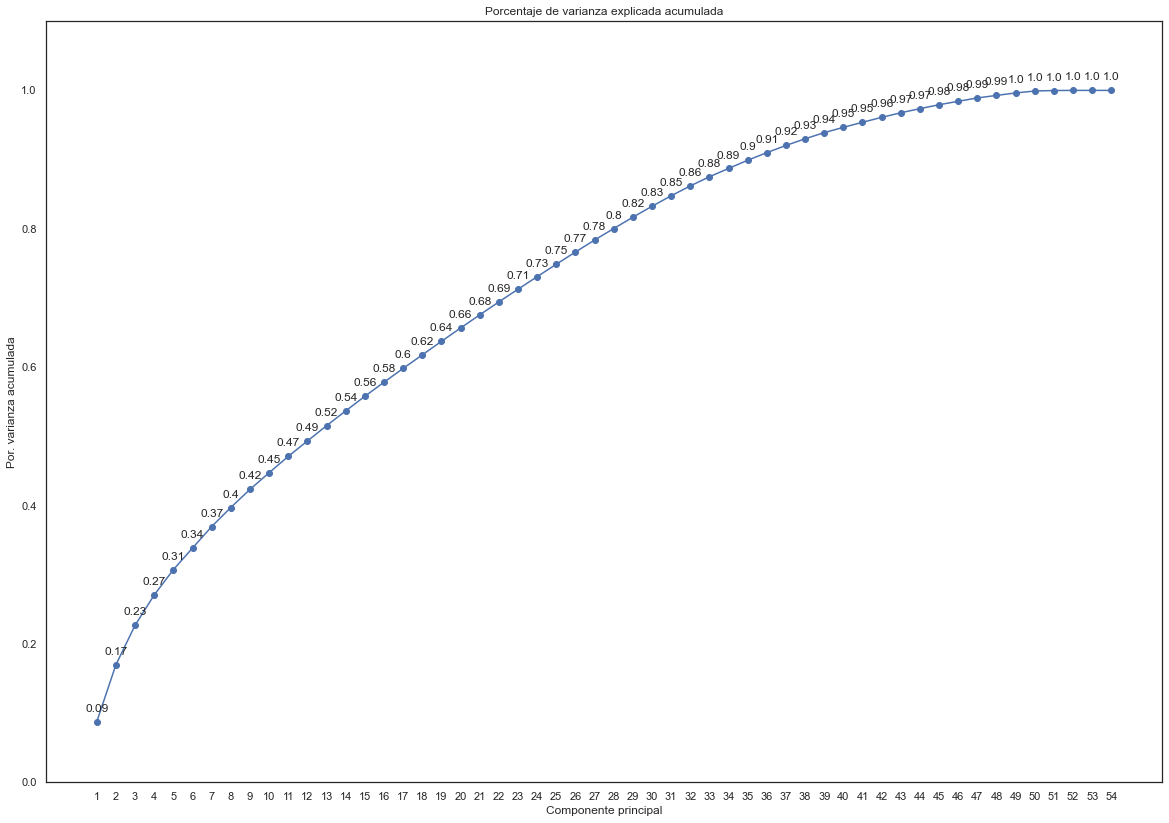

In [111]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 14))
ax.plot(
    np.arange(len(df1[Var_continuas2].columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df1[Var_continuas2].columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')
plt.show()

No se aprecia claramente ningún codo, es decir, todas las componentes aportan una cantidad necesaria de información para evaluar el modelo, por lo que en nuestro caso no tendría mucho sentido implementar este análisis de componentes principales ya que no se conseguiría el objetivo de reducir dimensiones eficientemente.
Se podría quedar con 12 componentes( o alguna más) para evaluar nuestros modelos, pero no se va a realizar debido a que pueden que se encuentren anomalías en nuestros modelos al haber podido despreciar información que sí era importante para nuestro objetivo de predecir la variable objetivo 'Price'.
Además mientras se han tratado los datos hemos decidido eliminar algunas variables muy correladas entre sí para tener las características que más información recogen, y también se han eliminado variables que estaban mínimamente correladas con el precio, por lo que al haberse realizado esto puede afectar a nuestr modelo PCA.
Por estas razones se decide no incluir el análisis de componentes principales a nuestro estudio, pero resilta interesante que quede constancia de él como método de aprendizaje no supervisado que en muchos otros tipos de problemas resulta verdaderamente útil y eficiente.
Ahora se va a proceder a realizar las transformaciones necesarias en nuestras variables categóricas para enriquecer nuestro objetivo:

# Creación, hiperparametrización y evaluación de modelos

### Dividir dataset

In [112]:
#Creación de train y test
from sklearn.model_selection import train_test_split
train , test = train_test_split(df1, test_size = 0.2)

x_train = train.drop('Price', axis=1)
y_train = train['Price']

x_test = test.drop('Price', axis = 1)
y_test = test['Price']

### Normalizar

In [125]:
# Normalización

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.transform(x_test) # solo transform porque es test
x_test = pd.DataFrame(x_test_scaled)

In [126]:
#Error rate
#Paquetes importados
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

# Naive Regressor

Para tener la línea base más simple que se puede tener se va a crear un modelo que modele (válgase la redundancia) la variable de salida a partir de la media de los datos de entrenamiento. Este modelo equivaldría a un modelo lineal con tan solo un parámetro (el denominado en la diapositiva 3 de la presentación _III: Métodos de Regresión Lineal_ beta0)

In [127]:
y_train_pred_naive = np.repeat(np.mean(y_train), len(y_train))
y_test_pred_naive = np.repeat(np.mean(y_train), len(y_test))

In [128]:
print("El RMSE del modelo es")
print("Para los datos de entrenamiento:", round(sqrt(mean_squared_error(y_train, y_train_pred_naive)),2))
print("Para los datos de test:", round(sqrt(mean_squared_error(y_test, y_test_pred_naive)),2))
print("")
print("El MAE del modelo es")
print("Para los datos de entrenamiento:", round(mean_absolute_error(y_train, y_train_pred_naive),2))
print("Para los datos de test:", round(mean_absolute_error(y_test, y_test_pred_naive),2))

El RMSE del modelo es
Para los datos de entrenamiento: 71.72
Para los datos de test: 73.23

El MAE del modelo es
Para los datos de entrenamiento: 42.41
Para los datos de test: 42.51


# KNN REGRESSION

Se procede con la regresión KNN ya que el objetivo de este estudio es de tipo predicción.

In [129]:
# Importar función GridSearch
from sklearn.model_selection import GridSearchCV

In [130]:
from sklearn.neighbors import KNeighborsRegressor

# Crear un diccionario con los parámetros que se quieren hiperparametrizar y los valores que se quieren probar
parameters = {'n_neighbors': [3,5,7,9]}
# Hiperparametrizar el modelo con GridSearch y como métrica el mean squared error
model = GridSearchCV(KNeighborsRegressor(), parameters, scoring = "neg_mean_squared_error")
# Ajustarlo a los datos de hiperparametrización
model.fit(x_train, y_train)
# Mostrar los mejores hiperparámetros
print("El número de vecinos que optimiza el RMSE es: n_neighbors =", model.best_params_["n_neighbors"])
# Crear un modelo con los mejores parámetros (hiperparametrizado)
model = KNeighborsRegressor(n_neighbors = model.best_params_["n_neighbors"])
# Entrenar el modelo con el dataset de entrenamiento
model.fit(x_train, y_train)

El número de vecinos que optimiza el RMSE es: n_neighbors = 7


KNeighborsRegressor(n_neighbors=7)

In [131]:
y_train_pred_knn = model.predict(x_train)
y_test_pred_knn = model.predict(x_test)

In [132]:
print("El RMSE del modelo es")
print("Para los datos de entrenamiento:", round(sqrt(mean_squared_error(y_train, y_train_pred_knn)),2))
print("Para los datos de test:", round(sqrt(mean_squared_error(y_test, y_test_pred_knn)),2))
print("")
print("El MAE del modelo es")
print("Para los datos de entrenamiento:", round(mean_absolute_error(y_train, y_train_pred_knn),2))
print("Para los datos de test:", round(mean_absolute_error(y_test, y_test_pred_knn),2))

El RMSE del modelo es
Para los datos de entrenamiento: 42.23
Para los datos de test: 50.15

El MAE del modelo es
Para los datos de entrenamiento: 20.22
Para los datos de test: 23.97


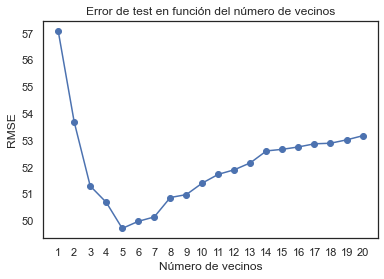

In [133]:
rmse_val = [] #Para guardar los valores de rmse para diferentes k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
#Graficar el valor RMSE y K valor
plt.plot(range(1,21), rmse_val)
plt.scatter(range(1,21), rmse_val)
plt.ylabel("RMSE")
plt.xticks(range(1,21))
plt.xlabel("Número de vecinos")
plt.title("Error de test en función del número de vecinos")
plt.show()

## Forward Selection

Se crea una función que lleve a cabo el algoritmo de Forward Selection visto en la diapositiva 14 de la presentación _III: Métodos de Regresión Lineal. Dicho algoritmo se utilizará en otros modelos también.

Se crea además, una función que grafique el error obtenido en cada paso del algoritmo.

In [134]:
def forward_selection(model, x_train, y_train, max_features = np.inf):
    # Listas donde guardar resultados
    scores = []
    columns_selected = []
    # Para añadir la primera feature se crea un bucle
    for column in x_train.columns:
        model = model
        model.fit(np.array(x_train[column]).reshape(-1,1), y_train)
        scores.append(sqrt(mean_squared_error(model.predict(np.array(x_train[column]).reshape(-1,1)), y_train)))
    # Se añade a las columnas seleccionadas la mejor
    columns_selected.append(np.argmin(scores))
    # Para el resto de las features hasta que quede una
    for n_columns in range(len(x_train.columns)-2):
        # Si no se llega al maximo
        if len(columns_selected) >= max_features:
            break
        # Se calcula el rendimiento al añadir cada columna
        scores = []
        for column in x_train.columns[~x_train.columns.isin(columns_selected)]:
            model = model
            model.fit(x_train[columns_selected + [column]], y_train)
            scores.append(sqrt(mean_squared_error(model.predict(x_train[columns_selected + [column]]), y_train)))
        # Se añade a las columnas seleccionadas la mejor
        columns_selected.append(x_train.columns[~x_train.columns.isin(columns_selected)][np.argmin(scores)])
    return columns_selected

In [135]:
def plot_forward_selection_performance(model, features_selected, x_train, y_train, x_test, y_test, features_names, figsize=(10,4)):
    columns_considered = list()
    scores = []
    # Se calcula el rendimiento del modelo para cada columna que se añada
    for column_considered in features_selected:
        columns_considered.append(column_considered)
        model = model
        if len(columns_considered)>1:
            model.fit(x_train[columns_considered], y_train)
            scores.append(sqrt(mean_squared_error(model.predict(x_test[columns_considered]), y_test)))
        else:
            model.fit(np.array(x_train[columns_considered]).reshape(-1,1), y_train)
            scores.append(sqrt(mean_squared_error(model.predict(np.array(x_test[columns_considered]).reshape(-1,1)), y_test)))
    # Se crea la gráfica
    plt.figure(figsize = figsize)
    plt.plot(features_names[features_selected], scores)
    plt.ylabel("RMSE", fontsize=14)
    plt.xlabel("Feature added", fontsize=14)
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.show()

In [137]:
features_selected_knn = forward_selection(KNeighborsRegressor(n_neighbors=7), x_train, y_train, max_features=15)

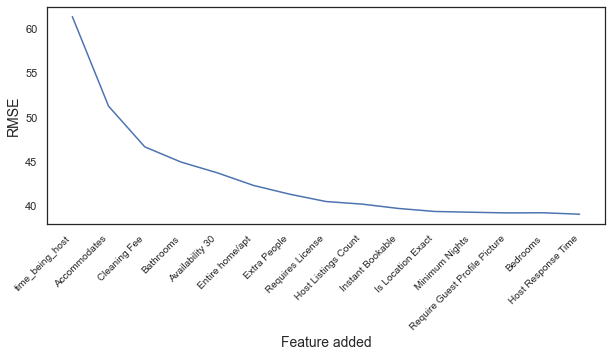

In [138]:
plot_forward_selection_performance(KNeighborsRegressor(n_neighbors=7), features_selected_knn, x_train, y_train, x_train, y_train, train.drop('Price', axis=1).columns)

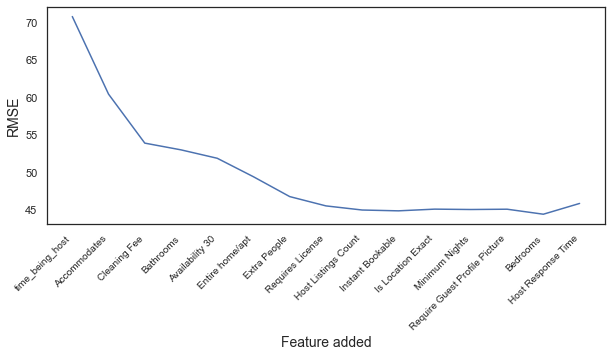

In [139]:
plot_forward_selection_performance(KNeighborsRegressor(n_neighbors=7), features_selected_knn, x_train, y_train, x_test, y_test, train.drop('Price', axis=1).columns)

## Hiperparametrización

In [140]:
# Crear un diccionario con los parámetros que se quieren hiperparametrizar y los valores que se quieren probar
parameters = {'n_neighbors': [3,5,7,9]}
# Hiperparametrizar el modelo con GridSearch y como métrica el mean squared error
model = GridSearchCV(KNeighborsRegressor(), parameters, scoring = "neg_mean_squared_error")
# Ajustarlo a los datos de hiperparametrización
model.fit(x_train[features_selected_knn], y_train)
# Mostrar los mejores hiperparámetros
print("El número de vecinos que optimiza el RMSE es: n_neighbors =", model.best_params_["n_neighbors"])
# Crear un modelo con los mejores parámetros (hiperparametrizado)
model = KNeighborsRegressor(n_neighbors = model.best_params_["n_neighbors"])
# Entrenar el modelo con el dataset de entrenamiento
model.fit(x_train[features_selected_knn], y_train)

El número de vecinos que optimiza el RMSE es: n_neighbors = 5


KNeighborsRegressor()

In [141]:
y_train_pred_knn_fs = model.predict(x_train[features_selected_knn])
y_test_pred_knn_fs = model.predict(x_test[features_selected_knn])

In [142]:
print("El RMSE del modelo es")
print("Para los datos de entrenamiento:", round(sqrt(mean_squared_error(y_train, y_train_pred_knn_fs)),2))
print("Para los datos de test:", round(sqrt(mean_squared_error(y_test, y_test_pred_knn_fs)),2))
print("")
print("El MAE del modelo es")
print("Para los datos de entrenamiento:", round(mean_absolute_error(y_train, y_train_pred_knn_fs),2))
print("Para los datos de test:", round(mean_absolute_error(y_test, y_test_pred_knn_fs),2))

El RMSE del modelo es
Para los datos de entrenamiento: 37.03
Para los datos de test: 46.84

El MAE del modelo es
Para los datos de entrenamiento: 18.34
Para los datos de test: 23.39


# MultiLinear Regresión

Se emplea el modelo de regresión múltiple para predecir el valor de la variable dependiente, "Price". 
Para poder determinar qué impacto tienen en el modelo cada una de las variables, se emplean los coeficientes parciales estandarizados ("feature_importances"), que se obtienen al estandarizar las variables predictoras previo ajuste del modelo. 

In [143]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [144]:
y_train_pred_linear = model.predict(x_train)
y_test_pred_linear = model.predict(x_test)

In [145]:
print("El RMSE del modelo es")
print("Para los datos de entrenamiento:", round(sqrt(mean_squared_error(y_train, y_train_pred_linear)),2))
print("Para los datos de test:", round(sqrt(mean_squared_error(y_test, y_test_pred_linear)),2))
print("")
print("El MAE del modelo es")
print("Para los datos de entrenamiento:", round(mean_absolute_error(y_train, y_train_pred_linear),2))
print("Para los datos de test:", round(mean_absolute_error(y_test, y_test_pred_linear),2))

El RMSE del modelo es
Para los datos de entrenamiento: 51.05
Para los datos de test: 53.7

El MAE del modelo es
Para los datos de entrenamiento: 26.21
Para los datos de test: 26.62


In [146]:
feature_importances = abs(model.coef_)
feature_importances_sorted = np.sort(feature_importances)

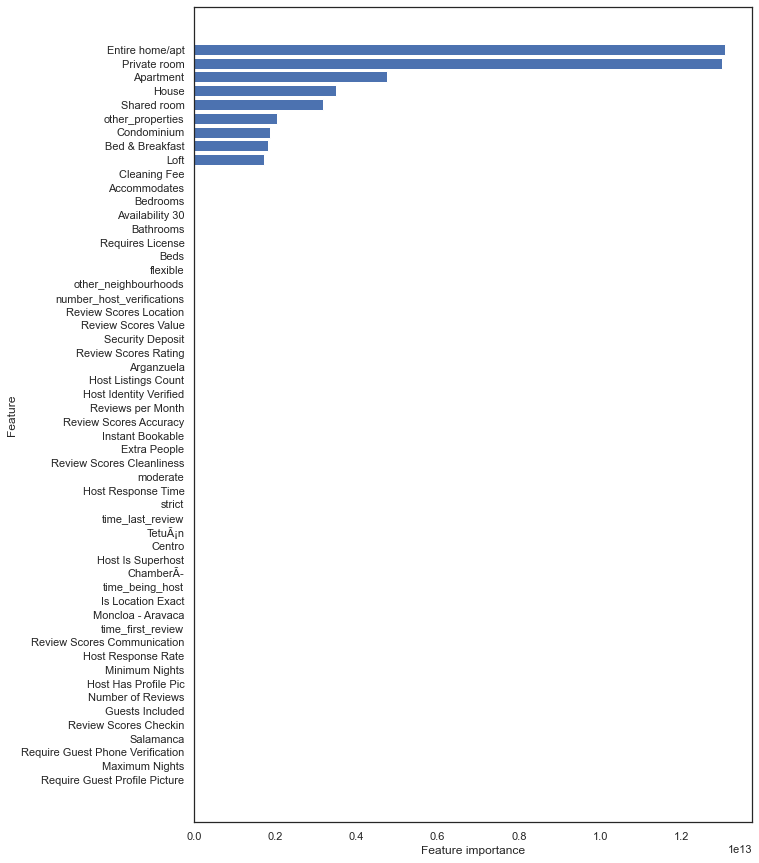

In [147]:
plt.figure(figsize=(10,15))
plt.barh(train.drop('Price', axis=1).columns[feature_importances.argsort()], feature_importances_sorted)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

El orden de magnitud de la importancia de las features es muchíshimo más alto de lo esperado

In [148]:
features_selected_linear = forward_selection(LinearRegression(), x_train, y_train)

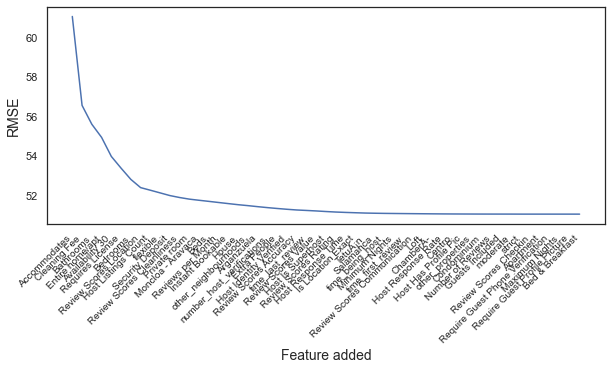

In [149]:
plot_forward_selection_performance(LinearRegression(), features_selected_linear, x_train, y_train, x_train, y_train, train.drop('Price', axis=1).columns)

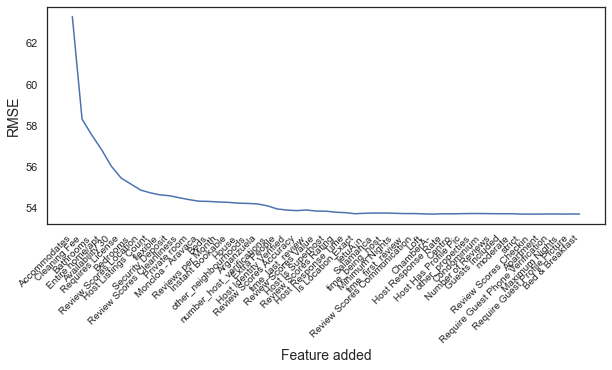

In [150]:
plot_forward_selection_performance(LinearRegression(), features_selected_linear, x_train, y_train, x_test, y_test, train.drop('Price', axis=1).columns)

In [151]:
model = LinearRegression()
model.fit(x_train[features_selected_linear[:15]], y_train)

LinearRegression()

In [152]:
y_train_pred_linear_fs = model.predict(x_train[features_selected_linear[:15]])
y_test_pred_linear_fs = model.predict(x_test[features_selected_linear[:15]])

In [153]:
print("El RMSE del modelo es")
print("Para los datos de entrenamiento:", round(sqrt(mean_squared_error(y_train, y_train_pred_linear_fs)),2))
print("Para los datos de test:", round(sqrt(mean_squared_error(y_test, y_test_pred_linear_fs)),2))
print("")
print("El MAE del modelo es")
print("Para los datos de entrenamiento:", round(mean_absolute_error(y_train, y_train_pred_linear_fs),2))
print("Para los datos de test:", round(mean_absolute_error(y_test, y_test_pred_linear_fs),2))

El RMSE del modelo es
Para los datos de entrenamiento: 51.7
Para los datos de test: 54.31

El MAE del modelo es
Para los datos de entrenamiento: 26.36
Para los datos de test: 26.56


## Decision Tree Regressor

Se procede con un regresor de tipo árbol de decisión ya que potencian modelos predictivos con alta precisión, estabilidad y facilidad de interpretación. Es fácil de entender, útil en la exploración de datos e idóneo para datos de entrada poco dispersos.

In [154]:
from sklearn.tree import DecisionTreeRegressor
# Crear un diccionario con los parámetros que se quieren hiperparametrizar y los valores que se quieren probar
parameters = {'max_depth': [3,5,7,9]}
# Hiperparametrizar el modelo con GridSearch y como métrica el mean squared error
model = GridSearchCV(DecisionTreeRegressor(), parameters, scoring = "neg_mean_squared_error")
# Ajustarlo a los datos de hiperparametrización
model.fit(x_train, y_train)
# Mostrar los mejores hiperparámetros
print("La máxima profundidad que optimiza el RMSE es: max_depth =", model.best_params_["max_depth"])
# Crear un modelo con los mejores parámetros (hiperparametrizado)
model = DecisionTreeRegressor(max_depth = model.best_params_["max_depth"])
# Entrenar el modelo con el dataset de entrenamiento
model.fit(x_train, y_train)

La máxima profundidad que optimiza el RMSE es: max_depth = 5


DecisionTreeRegressor(max_depth=5)

In [155]:
y_train_pred_tree = model.predict(x_train)
y_test_pred_tree = model.predict(x_test)

In [156]:
print("El RMSE del modelo es")
print("Para los datos de entrenamiento:", round(sqrt(mean_squared_error(y_train, y_train_pred_tree)),2))
print("Para los datos de test:", round(sqrt(mean_squared_error(y_test, y_test_pred_tree)),2))
print("")
print("El MAE del modelo es")
print("Para los datos de entrenamiento:", round(mean_absolute_error(y_train, y_train_pred_tree),2))
print("Para los datos de test:", round(mean_absolute_error(y_test, y_test_pred_tree),2))

El RMSE del modelo es
Para los datos de entrenamiento: 46.7
Para los datos de test: 54.73

El MAE del modelo es
Para los datos de entrenamiento: 24.6
Para los datos de test: 25.56


# Random Forest Regression

Es una generalización del modelo anterior pero se utiliza con el fin de ver si, como dice la norma general, el error de generalización es mejor.

## Hiperparametrización

In [157]:
# Importar RF de la biblioteca
from sklearn.ensemble import RandomForestRegressor
# Crear un diccionario con los parámetros que se quieren hiperparametrizar y los valores que se quieren probar
parameters = {'max_depth': [11,13,15,17], 'n_estimators':[100,200], 'random_state':[42]}
# Hiperparametrizar el modelo con GridSearch y como métrica el mean squared error
model = GridSearchCV(RandomForestRegressor(), parameters, scoring = "neg_mean_squared_error")
# Ajustarlo a los datos de hiperparametrización
model.fit(x_train, y_train)
# Mostrar los mejores hiperparámetros
print("La máxima profundidad que optimiza el RMSE es: max_depth =", model.best_params_["max_depth"])
print("El número de estimadores que optimiza el RMSE es: max_depth =", model.best_params_["n_estimators"])
# Crear un modelo con los mejores parámetros (hiperparametrizado)
model = RandomForestRegressor(n_estimators = model.best_params_["n_estimators"],
                              max_depth = model.best_params_["max_depth"],
                              random_state=42)
# Entrenar el modelo con el dataset de entrenamiento
model.fit(x_train, y_train)

La máxima profundidad que optimiza el RMSE es: max_depth = 17
El número de estimadores que optimiza el RMSE es: max_depth = 100


RandomForestRegressor(max_depth=17, random_state=42)

In [158]:
feature_importances = model.feature_importances_
feature_importances_sorted = np.sort(feature_importances)

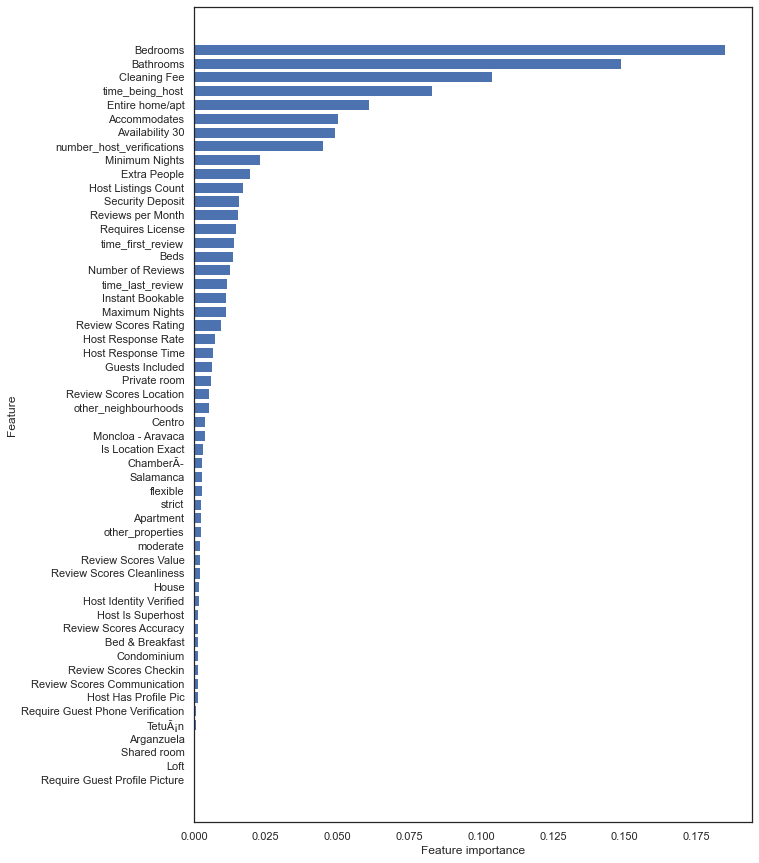

In [159]:
plt.figure(figsize=(10,15))
plt.barh(train.drop('Price', axis=1).columns[feature_importances.argsort()], feature_importances_sorted)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [160]:
y_train_pred_rf = model.predict(x_train)
y_test_pred_rf = model.predict(x_test)

In [161]:
print("El RMSE del modelo es")
print("Para los datos de entrenamiento:", round(sqrt(mean_squared_error(y_train, y_train_pred_rf)),2))
print("Para los datos de test:", round(sqrt(mean_squared_error(y_test, y_test_pred_rf)),2))
print("")
print("El MAE del modelo es")
print("Para los datos de entrenamiento:", round(mean_absolute_error(y_train, y_train_pred_rf),2))
print("Para los datos de test:", round(mean_absolute_error(y_test, y_test_pred_rf),2))

El RMSE del modelo es
Para los datos de entrenamiento: 18.9
Para los datos de test: 44.31

El MAE del modelo es
Para los datos de entrenamiento: 11.01
Para los datos de test: 20.59


# XGboost Regression

Este algoritmo ha despertado gran interés para este estudio ya que uno de los sectores en los que se aplican este tipo de algoritmos es en el financiero. Como el objetivo de este estudio es crear un evaluador automático de precios a partir de las carácterísticas de los alojamientos, este modelo puede ser muy relevante.

In [162]:
import warnings
warnings.filterwarnings("ignore")

In [163]:
from xgboost import XGBRFRegressor
# Crear un diccionario con los parámetros que se quieren hiperparametrizar y los valores que se quieren probar
parameters = {'max_depth': [7,9,11,13], 'n_estimators':[100,200], 'random_state':[42]}
# Hiperparametrizar el modelo con GridSearch y como métrica el mean squared error
model = GridSearchCV(XGBRFRegressor(), parameters, scoring = "neg_mean_squared_error")
# Ajustarlo a los datos de hiperparametrización
model.fit(x_train, y_train)
# Mostrar los mejores hiperparámetros
print("La máxima profundidad que optimiza el RMSE es: max_depth =", model.best_params_["max_depth"])
print("El número de estimadores que optimiza el RMSE es: max_depth =", model.best_params_["n_estimators"])
# Crear un modelo con los mejores parámetros (hiperparametrizado)
model = XGBRFRegressor(n_estimators = model.best_params_["n_estimators"],
                       max_depth = model.best_params_["max_depth"],
                       random_state=42)
# Entrenar el modelo con el dataset de entrenamiento
model.fit(x_train, y_train)
 # create regressor object
model = XGBRFRegressor(n_estimators = 100, random_state = 42)
# fit the regressor with x and y data
model.fit(x_train, y_train)

La máxima profundidad que optimiza el RMSE es: max_depth = 13
El número de estimadores que optimiza el RMSE es: max_depth = 100


XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, enable_categorical=False, gamma=0, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=8,
               num_parallel_tree=100, objective='reg:squarederror',
               predictor='auto', random_state=42, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [164]:
y_train_pred_xgb = model.predict(x_train)
y_test_pred_xgb = model.predict(x_test)

In [165]:
print("El RMSE del modelo es")
print("Para los datos de entrenamiento:", round(sqrt(mean_squared_error(y_train, y_train_pred_xgb)),2))
print("Para los datos de test:", round(sqrt(mean_squared_error(y_test, y_test_pred_xgb)),2))
print("")
print("El MAE del modelo es")
print("Para los datos de entrenamiento:", round(mean_absolute_error(y_train, y_train_pred_xgb),2))
print("Para los datos de test:", round(mean_absolute_error(y_test, y_test_pred_xgb),2))

El RMSE del modelo es
Para los datos de entrenamiento: 39.97
Para los datos de test: 48.07

El MAE del modelo es
Para los datos de entrenamiento: 21.97
Para los datos de test: 23.5


# Neural Network

Puesto que la base de datos de este estudio cuenta con un 14870 datos, se procede a hacer un modelo de redes simples que se caracterizan por tener arquitecturas relativamente sencillas por lo que los requerimientos computacionales no son muy elevados.

In [166]:
from sklearn.neural_network import MLPRegressor
# Crear un diccionario con los parámetros que se quieren hiperparametrizar y los valores que se quieren probar
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
parameters = {'hidden_layer_sizes': [(100), (100,100)],
              'solver': ['adam'],
              'batch_size': [256, 512],
              'learning_rate_init': [1e-4, 1e-3],
              'random_state': [42]}
# Hiperparametrizar el modelo con GridSearch y como métrica el mean squared error
model = GridSearchCV(MLPRegressor(), parameters, scoring = "neg_mean_squared_error")
# Ajustarlo a los datos de hiperparametrización
model.fit(x_train, y_train)
# Mostrar los mejores hiperparámetros
print("La arquitectura de capas que optimiza el RMSE es: hidden_layer_sizes =", model.best_params_["hidden_layer_sizes"])
print("El resolvedor que optimiza el RMSE es: solver =", model.best_params_["solver"])
print("El tamaño de lote que optimiza el RMSE es: batch_size =", model.best_params_["batch_size"])
print("La tasa de aprendizaje que optimiza el RMSE es: learning_rate_init =", model.best_params_["learning_rate_init"])
# Crear un modelo con los mejores parámetros (hiperparametrizado)
model = MLPRegressor(hidden_layer_sizes = model.best_params_["hidden_layer_sizes"],
                     solver = model.best_params_["solver"],
                     batch_size = model.best_params_["batch_size"],
                     learning_rate_init = model.best_params_["learning_rate_init"],
                     random_state=42)
# Entrenar el modelo con el dataset de entrenamiento
model.fit(x_train, y_train)

La arquitectura de capas que optimiza el RMSE es: hidden_layer_sizes = (100, 100)
El resolvedor que optimiza el RMSE es: solver = adam
El tamaño de lote que optimiza el RMSE es: batch_size = 256
La tasa de aprendizaje que optimiza el RMSE es: learning_rate_init = 0.0001


MLPRegressor(batch_size=256, hidden_layer_sizes=(100, 100),
             learning_rate_init=0.0001, random_state=42)

In [167]:
y_train_pred_nn = model.predict(x_train)
y_test_pred_nn = model.predict(x_test)

In [168]:
print("El RMSE del modelo es")
print("Para los datos de entrenamiento:", round(sqrt(mean_squared_error(y_train, y_train_pred_nn)),2))
print("Para los datos de test:", round(sqrt(mean_squared_error(y_test, y_test_pred_nn)),2))
print("")
print("El MAE del modelo es")
print("Para los datos de entrenamiento:", round(mean_absolute_error(y_train, y_train_pred_nn),2))
print("Para los datos de test:", round(mean_absolute_error(y_test, y_test_pred_nn),2))

El RMSE del modelo es
Para los datos de entrenamiento: 44.9
Para los datos de test: 49.31

El MAE del modelo es
Para los datos de entrenamiento: 22.73
Para los datos de test: 24.04


# Conclusiones

El objetivo de este trabajo era el de crear un evaluador de precios a partir de las carácterísticas de los alojamientos. Características tales como: la ubicación, el número de camas, el tipo de alojamiento, desde cuando el anfitrión era anfitrión de Aribnb, entre otros. 

Para ello, se ha optado por analizar seis modelos diferentes, después de realizar un preprocesamiento exhaustivo ya que se contaba con un número muy elevado y disperso de variables. 

Se ha utilizado el Naive Regressor con el fin de hacer una comparación con los otros modelos.

Los seis modelos analizados son: Knn Regression, MultiLinear Regressor, Decision Tree Regressor, Random Forest Regressor, XGBoost Regressor y Neural Network. Se puede apreciar que el modelo con menor error cuadrático medio en test es Random Forest con un valor de 44.31 y el que mayor error cuadrático medio en test tiene es Decision Tree con 54.73. 

Se ha decidido realizar Forward Selection en alguno de ellos ya que la maldición de la dimensionalidad afecta muy considerablemente al Knn. No se ha utilizado en todos debido al alto coste computacional que supondría; pero no se descarta hacerlo en un futuro. Óbservese como el modelo de Knn aumenta su rendimiento al utilizar dicho algoritmo a pesar de estas utilizando muchas menos variables. 

Llama la atención cómo el resultado al usar XGBoost Rf Regressor es menor que el obtenido con el Rf Regressor a pesar de ser una supuesta mejora construida de este. 

El potencial de las redes neuronales no es visible en esta práctica debido a que la arquitectura de la misma ha sido diseñada sin conocimiento experto. Tal vez con un número más elevado de datos se podría  ver una mejora.

Se puede ver como está sobreajustando (overfitting) el modelo Random Forest ya que el error de train es bastante menor que el de test (18.9 en entrenamiento y 44.31 en test).